In [1]:
#Importamos la librería requests
import requests

In [2]:
#Definimos la variable url con el sitio web al que haremos scraping
url = 'https://www.pagina12.com.ar/'

In [3]:
#Hacemos un get request a la url (Si está todo ok, debe devolver 200)
p12 = requests.get(url)

In [4]:
#Revisamos el código de respuesta del request efectuado anteriormente
p12.status_code

200

In [5]:
#Imprimimos por pantalla lo que el servidor nos retorna, en este caso un archivo html
print(p12.text)

<!DOCTYPE html><html class="no-js " lang="es"><head><meta charset="utf-8"><title>Página12 | La otra mirada</title><meta name="google-site-verification" content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg"><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","name": "Página12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}</script><meta property="description" name="description" content="Notas focalizadas en el quehacer político de la Argentina."><meta property="fb:pages" name="fb:pages" content="1541638399393436"><meta property="og:locale" name="og:locale" content="es_AR"><meta property="og:title" name="og:title" content="Página12 | La otra mirada"><

In [6]:
#Usando el método content, nos devuelve lo mismo, pero en binario.
p12.content

b'<!DOCTYPE html><html class="no-js " lang="es"><head><meta charset="utf-8"><title>P\xc3\xa1gina12 | La otra mirada</title><meta name="google-site-verification" content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg"><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","name": "P\xc3\xa1gina12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}</script><meta property="description" name="description" content="Notas focalizadas en el quehacer pol\xc3\xadtico de la Argentina."><meta property="fb:pages" name="fb:pages" content="1541638399393436"><meta property="og:locale" name="og:locale" content="es_AR"><meta property="og:title" name="og:title" content="P\xc3

In [7]:
#Con el método headers, nos retorna las cabeceras del archivo que nos retorna el servidor
p12.headers

{'Date': 'Tue, 23 Aug 2022 18:03:17 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'vary': 'Accept-Encoding', 'x-dns-prefetch-control': 'off', 'strict-transport-security': 'max-age=15724800; includeSubDomains', 'x-download-options': 'noopen', 'x-content-type-options': 'nosniff', 'x-xss-protection': '1; mode=block', 'x-etag': 'W/"67231-0NdprpBhlSpkLpx4F/GmPweTJBw"', 'x-backend': 'frontend', 'x-type': 'Dynamic URI', 'x-backend-ttl': '120.000', 'age': '83', 'grace': '86400.000 none', 'ttl': '36.013', 'x-instance': 'cache-front-prod-varnish-86499455f8-kx55w', 'x-restarts': '0', 'x-cache': 'hit cached', 'CF-Cache-Status': 'DYNAMIC', 'Expect-CT': 'max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/beacon/expect-ct"', 'Server': 'cloudflare', 'CF-RAY': '73f5c39849ced72e-SCL', 'Content-Encoding': 'br'}

In [8]:
#Con request.headers nos devuelve las cabaceras que nosotros enviamos al servidor al hacer request
p12.request.headers

{'User-Agent': 'python-requests/2.27.1', 'Accept-Encoding': 'gzip, deflate, br', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [9]:
#request.method nos retorna el método de consulta que utilizamos. Para este caso, es el método GET
p12.request.method

'GET'

In [10]:
#request.url nos retorna la url a la que estamos consultando
p12.request.url

'https://www.pagina12.com.ar/'

In [11]:
#Importamos la libreria BeautifulSoup
from bs4 import BeautifulSoup

In [12]:
#Transformamos el texto con etiquetas html a un objeto BeautifulSoup, parseandolo con lxml 
s = BeautifulSoup(p12.text, 'lxml')

In [13]:
type(s)

bs4.BeautifulSoup

In [14]:
#Se imprime por pantalla la 'sopa', que vendría siendo la página identada
print(s.prettify())

<!DOCTYPE html>
<html class="no-js" lang="es">
 <head>
  <meta charset="utf-8"/>
  <title>
   Página12 | La otra mirada
  </title>
  <meta content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg" name="google-site-verification"/>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","name": "Página12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}
  </script>
  <meta content="Notas focalizadas en el quehacer político de la Argentina." name="description" property="description"/>
  <meta content="1541638399393436" name="fb:pages" property="fb:pages"/>
  <meta content="es_AR" name="og:locale" property="og:locale"/>
  <meta content="Página12 | La otra 

In [15]:
#Extraemos las secciones del diario
#Usamos el método find en el objeto 's' y definimos la etiqueta está la infomación que se quiere extraer.
#Estos se encuentran en una lista 'ul'. Al indicar los atributos como un diccionario, indicamos la clase
#especifica de la ul que queremos.Finalmente, con el método find_all('li'), lo que hacemos es que nos retorne
#todas las etiquetas li dentro de esta ul, como una lista
secciones = s.find('ul', attrs={'class':'horizontal-list main-sections hide-on-dropdown'}).find_all('li')

In [16]:
secciones

[<li class="p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li>,
 <li class="p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/economia">Economía</a></li>,
 <li class="p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/sociedad">Sociedad</a></li>,
 <li class="no-separator-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos">Espectáculos</a></li>,
 <li class="hide-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/deportes">Deportes</a></li>,
 <li class="hide-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/ciencia">Ciencia</a></li>,
 <li class="hide-on-1040"><a href="https://www.pagina12.com.ar/secciones/el-mundo">El mundo</a></li>]

In [17]:
#Con el indicador [0] hacemos que nos retorne el primer elemento de la lista secciones, en este caso, todo 
#lo correspondiente a la sección 'El País'. Guardamos el resultado en la variable 'seccion'
seccion = secciones[0]
print(seccion)

<li class="p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li>


In [18]:
#Para extraer el link de la sección, primero extremos el tag 'a' de la variable 'seccion'
#Usar section.a equivalente a seccion.find('a')
seccion.a


<a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a>

In [19]:
#Una vez separado el tag, usamos el método get() para obtener el link como un string
seccion.a.get('href')

'https://www.pagina12.com.ar/secciones/el-pais'

In [20]:
#Para obtener el texto contenido entre los tag 'a' usamos el método get_text()
seccion.a.get_text()

'El país'

In [21]:
#Creamos una lista con los links de cada sección
#El método abreviado para hacerlo es
#link_secciones = [seccion.a.get('href') for seccion in secciones]

link_secciones = []
for seccion in secciones:
    link_secciones.append(seccion.a.get('href'))

In [22]:
link_secciones

['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/ciencia',
 'https://www.pagina12.com.ar/secciones/el-mundo']

In [23]:
#Hacemos un request al primer link de nuestra lista link_secciones, en este caso, corresponde a la sección
#El País
sec = requests.get(link_secciones[0])

In [24]:
#Revisamos el código de respuesta del request efectuado anteriormente
sec.status_code

200

In [25]:
#Transformamos el texto con etiquetas html a un objeto BeautifulSoup, parseandolo con lxml 
s_seccion = BeautifulSoup(sec.text, 'lxml')

In [26]:
#Se imprime por pantalla la 'sopa', que vendría siendo la página identada
print(s_seccion.prettify())

<!DOCTYPE html>
<html amp="" lang="es">
 <head>
  <meta charset="utf-8"/>
  <title>
   El país | Página12
  </title>
  <!-- DUST PATH: /usr/src/app/src/widgets/fc_jsonLD.dust/ -->
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","name": "Página12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}
  </script>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "NewsArticle","mainEntityOfPage": {"@type": "WebPage","@id": "https://www.pagina12.com.ar/secciones/el-pais"},"headline": "El país | Página12","isAccessibleForFree": "False","image": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/lo

In [27]:
#Revisamos la estructura html de la sección El País con el Inspector de Elementos del navegador
#Podemos ver que está compuesta por un artículo principal, dos articulos secundarios y un listado de articulos.
#*IMPORTANTE*: La estructura del sitio web puede cambiar con el tiempo, dependiendo de las modificaciones que hagan
#los desarrolladores frontend

ma = s_seccion.find('section', attrs={'class':'top-content'}).find_all('h2')
main_article = [url[0:-1]+ma.find('a').get('href') for ma in ma]
main_article

['https://www.pagina12.com.ar/475653-cristina-kircher-hablo-del-juicio-por-la-obra-publica-y-most']

In [28]:
featured_articles = s_seccion.find_all('article', attrs={'class':'article-item--featured'})
featured_article_list = [url[0:-1]+fa.find('h3').find('a').get('href') for fa in featured_articles]
featured_article_list

['https://www.pagina12.com.ar/475652-diputados-avanza-en-la-ley-de-alcohol-cero-al-volante',
 'https://www.pagina12.com.ar/475642-quien-es-francisco-sanchez-el-diputado-del-pro-que-pidio-pen']

In [29]:
regular_articles = s_seccion.find_all('article', attrs={'class':'article-item article-item--teaser'})
regular_articles_list = [url[0:-1]+ra.find('h4').find('a').get('href') for ra in regular_articles]
regular_articles_list

['https://www.pagina12.com.ar/475636-repercusiones-tras-el-discurso-de-cristina-kirchner-sobre-la',
 'https://www.pagina12.com.ar/475608-el-grupo-de-puebla-declaro-su-apoyo-a-cristina-kirchner',
 'https://www.pagina12.com.ar/475606-causa-vialidad-la-historia-de-la-foto-de-cristina-kirchner-a',
 'https://www.pagina12.com.ar/475595-todas-las-definiciones-de-cristina-kirchner-sobre-la-causa-d',
 'https://www.pagina12.com.ar/475559-las-mejores-fotos-de-la-concentracion-en-apoyo-a-cristina-ki']

In [30]:
#Reto Platzi
#Definir una funcion que devuelva todos los links de las noticias de una sección
def get_links_noticias(seccion):

    main_article = seccion.find('section', attrs={'class':'top-content'}).find_all('h2')
    #Se usa url[0:-1] para quitar el último caracter de la url guardada anteriormente (https://www.pagina12.com.ar/)
    #y se concatena con el link de la noticia que está en forma relativa.
    main_article_list = [url[0:-1]+ma.find('a').get('href') for ma in main_article]

    featured_articles = seccion.find_all('article', attrs={'class':'article-item--featured'})
    featured_article_list = [url[0:-1]+fa.find('h3').find('a').get('href') for fa in featured_articles]

    regular_articles = seccion.find_all('article', attrs={'class':'article-item article-item--teaser'})
    regular_articles_list = [url[0:-1]+ra.find('h4').find('a').get('href') for ra in regular_articles]

    links = main_article_list + featured_article_list + regular_articles_list

    return links
    
#En la lista de los link de secciones deportes corresponde a la posicion 4
seccion_deportes = BeautifulSoup(requests.get(link_secciones[4]).text, 'lxml')
links = get_links_noticias(seccion_deportes)
links

['https://www.pagina12.com.ar/437395-todo-lo-que-estara-prohibido-en-qatar',
 'https://www.pagina12.com.ar/475274-las-apuestas-virtuales-un-peligroso-mercado-en-expansion',
 'https://www.pagina12.com.ar/475444-liga-profesional-el-central-de-tevez-no-pudo-de-local-con-ba',
 'https://www.pagina12.com.ar/475288-bernie-ecclestone-se-declaro-no-culpable-en-un-juicio-por-fr',
 'https://www.pagina12.com.ar/475291-el-futbol-ucraniano-reanuda-su-campeonato-con-tres-jugadores',
 'https://www.pagina12.com.ar/475293-alex-zverev-no-se-recupero-y-no-estara-en-el-us-open',
 'https://www.pagina12.com.ar/475385-liga-profesional-la-15-o-fecha-cierra-con-una-noche-de-emoci']

## Manejo de Excepciones

In [31]:
#Haremos la prueba de manejo de excepciones de forma práctica con una url que no funciona

url_mala = url.replace('2','3')
url_mala

'https://www.pagina13.com.ar/'

In [32]:
#La salida nos dará un error y como el scraper compila por línea, al encontrar un error se detendrá completamente.
requests.get(url_mala).status_code

ConnectionError: HTTPSConnectionPool(host='www.pagina13.com.ar', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f50a4c57730>: Failed to establish a new connection: [Errno -2] Name or service not known'))

In [ ]:
#Para evitar lo anterior, utilizamos el bloque try except
try:
    requests.get(url_mala)
except Exception as e:
    print('error en request')
    print('\n')
    print(e)
    print('\n')

In [33]:
#De igual manera, si alguna otra linea tiene un problema, se puede saltar
#p.e cambiamos una linea anterior y dejamos el typo find_alf en vez de find_all.
#Esto genera el siguiente error

regular_articles = seccion.find_alf('article', attrs={'class':'article-item article-item--teaser'})


TypeError: 'NoneType' object is not callable

In [34]:
#Aplicando try except podemos saltarnos este error
try:
    regular_articles = seccion.find_all('artico', attrs={'class':'article-item article-item--teaser'})
except:
    pass
print('se continuó ejecutando y no pescó el error anterior')

se continuó ejecutando y no pescó el error anterior


## Descargando el contenido

In [35]:
#El objetivo es obtener el títular, fecha, bajada, volanta, cuerpo y autor de la noticia
from datetime import datetime
url_nota = links[0]

try:
    nota = requests.get(url_nota)
    if nota.status_code == 200:
        s_nota = BeautifulSoup(nota.text, 'lxml')
        #Extraer título
        titulo = s_nota.find('h1')
        print(titulo.text)
        print('\n')
        #Extraer fecha
        fecha_str = s_nota.find('time').get('datetime') #Retorna un string de la fecha en formato ISO
        fecha = datetime.fromisoformat(fecha_str).date() #Quita el formato ISO de la fecha y retorna solo la fecha
        print(fecha)
        print('\n')
        #Extraer bajada
        bajada = s_nota.find('h3')
        print(bajada.text)
        print('\n')
        #Extraer volanta
        volanta = s_nota.find('h4')
        print(volanta.text)
        print('\n')
        #Extraer cuerpo
        cuerpo = s_nota.find('div', attrs={'class':'article-main-content article-text'}).find_all('p')
        parrafos = [c.text.strip().replace('\xa0',' ') for c in cuerpo]
        parrafos = [i for i in parrafos if i] #Para remover espacios en blanco
            # otra forma
            # parrafos =[]
            #for c in cuerpos:
            # parrafos.append(c.text.strip().replace('\xa0',''))
        print(parrafos)
        print('\n')
        #Extraer Autor
        autor = s_nota.find('div', attrs={'class':'author-name'})
        print(autor.text.replace('Por ',''))
        print('\n')
        
        
except Exception as e:
    print("Error:")
    print(e)
    print("\n")

Todo lo que estará prohibido en Qatar


2022-08-23


Qué dice la ley sobre los movimientos LGBT, el aborto, sexo por fuera del matrimonio, ofensas a la religión islámica, alcohol, drogas y apuestas. ¿Qué es la sharía?


De cara al Mundial 2022


['El Mundial de Fútbol se realizará este año en Qatar, entre los días 20 de noviembre y 18 de diciembre. Desde su designación como sede en 2010, numerosos organismos de derechos humanos como Amnistia Internacional y Human Rights Watch, entre otras, criticaron que el certamen se disputara en el país árabe debido a su legislación.', 'Dicho por sus mismas autoridades, Qatar es un país muy conservador, donde la religión tiene una importancia enorme. La ley está muy influenciada por la Sharia —ley islámica—, que es especialmente restrictiva con las mujeres y las diversidades sexuales. Los turistas argentinos que viajen para ver el Mundial se encontrarán con leyes muy distintas a las de nuestro país.', 'El director del comité organizador de la Copa d

In [50]:
#El objetivo es obtener el títular, fecha, bajada, volanta, cuerpo y autor de la noticia
from datetime import datetime
url_nota = links[0]

try:
    nota = requests.get(url_nota)
    if nota.status_code == 200:
        s_nota = BeautifulSoup(nota.text, 'lxml')
        #Extraer título
        titulo = s_nota.find('h1')
        print(titulo.text)
        print('\n')
        #Extraer fecha
        fecha_str = s_nota.find('time').get('datetime') #Retorna un string de la fecha en formato ISO
        fecha = datetime.fromisoformat(fecha_str).date() #Quita el formato ISO de la fecha y retorna solo la fecha
        print(fecha)
        print('\n')
        #Extraer bajada
        bajada = s_nota.find('h3')
        print(bajada.text)
        print('\n')
        #Extraer volanta
        volanta = s_nota.find('h4')
        print(volanta.text)
        print('\n')
        #Extraer cuerpo
        cuerpo = s_nota.find('div', attrs={'class':'article-main-content article-text'})
        print(cuerpo.text)
        print('\n')
        #Extraer Autor
        autor = s_nota.find('div', attrs={'class':'author-name'})
        print(autor.text.replace('Por ',''))
        print('\n')
        
except Exception as e:
    print("Error:")
    print(e)
    print("\n")

A los tucumanos no les sobra nada


2022-08-22








Cuando Lucas Pusineri asumió el 12 de abril pasado la dirección técnica en lugar de Juan Manuel Azconzábal, Atlético Tucumán era un alma en pena. Ocupaba el último puesto en la zona A de la Copa de la Liga, llevaba cinco fechas sin ganar, su promedio decaía jornada a jornada y el descenso era una posibilidad concreta de la que se hablaba en voz alta en cada rincón de aquella provincia.Cuatro meses más tarde, la vida le ríe y canta al Decano tucumano. Bajo la impronta de Pusineri, es el puntero inesperado de la Liga Profesional y uno de los grandes candidatos al título. Perdió apenas un partido de los catorce que disputó (3 a 1 ante Arsenal en Sarandí) y con un promedio mucho más robusto (1,244), tiene ocho equipos por detrás y ya no lo asusta bajar de categoría. Mas bien todo lo contrario: si llegara a derrotar a Barracas Central, Atlético Tucumán sumará 43 puntos en la tabla anual y se estará clasificando por ahora a la Copa Sudam

In [39]:
media = s_nota.find('figure', attrs={'class':'object-fit-block--contain intrinsic-container intrinsic-container-3x2'})

In [40]:
imagenes = media.find_all('img')
imagenes

[<img alt="Lucas Pusineri le cambió la cara a Atlético Tucumán (Fuente: NA)" class="" src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2022-08/619190-pusineri_0.jpg?itok=IDjbh20l"/>]

In [41]:
if len(imagenes) == 0:
    print('no hay imagenes')
else:
    imagen = imagenes[-1].get('src')
    print(imagen)

https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2022-08/619190-pusineri_0.jpg?itok=IDjbh20l


In [42]:
img_request = requests.get(imagen)

In [43]:
img_request.status_code

200

In [44]:
from IPython.display import Image

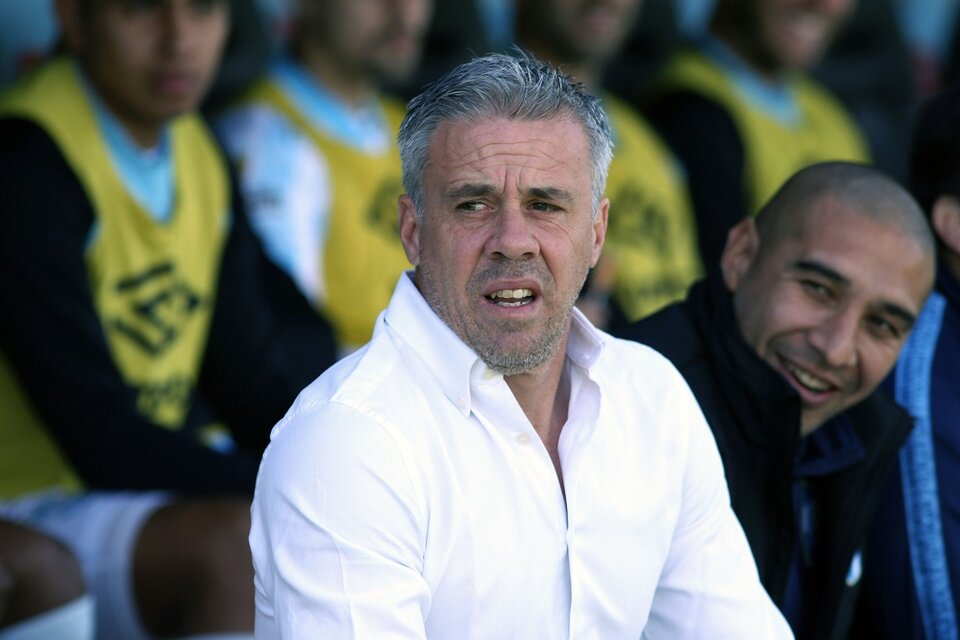

In [45]:
Image(img_request.content)